# Convolutional Neural Networks and Computer Vision with TensorFlow


## Get the data


In [1]:
import zipfile

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [7]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['pizza' 'steak']


we got a collection of 750 training images and 250 testing images of pizza and steak.


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory 
  target_folder = target_dir + target_class

  # random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # the shape of the image

  return img

Image shape: (512, 512, 3)


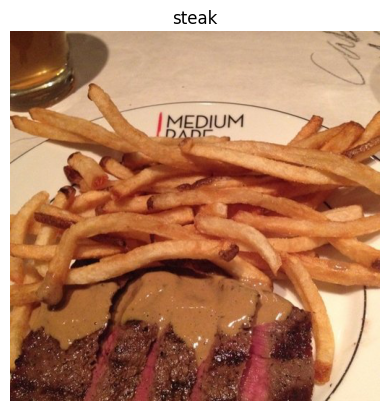

In [10]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [11]:
img

array([[[ 80,  32,  18],
        [ 77,  29,  15],
        [ 75,  27,  13],
        ...,
        [189, 163, 130],
        [196, 170, 137],
        [192, 166, 133]],

       [[ 79,  31,  17],
        [ 76,  28,  14],
        [ 74,  26,  12],
        ...,
        [155, 129,  96],
        [177, 151, 118],
        [192, 166, 133]],

       [[ 78,  30,  16],
        [ 76,  28,  14],
        [ 74,  26,  12],
        ...,
        [135, 109,  76],
        [149, 123,  90],
        [170, 144, 111]],

       ...,

       [[ 52,  18,  17],
        [ 63,  29,  28],
        [ 53,  19,  17],
        ...,
        [253, 237, 203],
        [253, 237, 203],
        [253, 237, 203]],

       [[ 53,  22,  20],
        [ 63,  32,  30],
        [ 56,  22,  21],
        ...,
        [253, 237, 203],
        [253, 237, 203],
        [252, 236, 202]],

       [[ 41,  10,   8],
        [ 62,  31,  29],
        [ 53,  19,  18],
        ...,
        [253, 237, 203],
        [252, 236, 202],
        [252, 236, 202]]

In [12]:
img.shape 

(512, 512, 3)

In [13]:
img/255. 

array([[[0.31372549, 0.1254902 , 0.07058824],
        [0.30196078, 0.11372549, 0.05882353],
        [0.29411765, 0.10588235, 0.05098039],
        ...,
        [0.74117647, 0.63921569, 0.50980392],
        [0.76862745, 0.66666667, 0.5372549 ],
        [0.75294118, 0.65098039, 0.52156863]],

       [[0.30980392, 0.12156863, 0.06666667],
        [0.29803922, 0.10980392, 0.05490196],
        [0.29019608, 0.10196078, 0.04705882],
        ...,
        [0.60784314, 0.50588235, 0.37647059],
        [0.69411765, 0.59215686, 0.4627451 ],
        [0.75294118, 0.65098039, 0.52156863]],

       [[0.30588235, 0.11764706, 0.0627451 ],
        [0.29803922, 0.10980392, 0.05490196],
        [0.29019608, 0.10196078, 0.04705882],
        ...,
        [0.52941176, 0.42745098, 0.29803922],
        [0.58431373, 0.48235294, 0.35294118],
        [0.66666667, 0.56470588, 0.43529412]],

       ...,

       [[0.20392157, 0.07058824, 0.06666667],
        [0.24705882, 0.11372549, 0.10980392],
        [0.20784314, 0

## An end-to-end example


In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 209ms/step - loss: 0.5981 - accuracy: 0.6773 - val_loss: 0.4158 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4584 - accuracy: 0.7967 - val_loss: 0.3675 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4656 - accuracy: 0.7893 - val_loss: 0.4424 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4098 - accuracy: 0.8380 - val_loss: 0.3485 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3708 - accuracy: 0.8453 - val_loss: 0.3162 - val_accuracy: 0.8820


In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before


In [16]:
tf.random.set_seed(42)

# Create a model 
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 197ms/step - loss: 1.7892 - accuracy: 0.4920 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [18]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), 
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 201ms/step - loss: 2.8247 - accuracy: 0.6413 - val_loss: 0.6214 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6881 - accuracy: 0.7300 - val_loss: 0.5762 - val_accuracy: 0.7140
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 1.2195 - accuracy: 0.6860 - val_loss: 0.6234 - val_accuracy: 0.7320
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.5172 - accuracy: 0.7893 - val_loss: 0.5061 - val_accuracy: 0.7600
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.5041 - accuracy: 0.7833 - val_loss: 0.4380 - val_accuracy: 0.8000


In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


The number of trainable parameters has increased even more than `model_2`. And even with close to 500x more trainable parameters, `model_3` still doesn't out perform `model_1`.



## Binary classification:

Steps:

1. Become one with the data 
2. Preprocess the data 
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model 
7. Repeat until get wanted result


### 1. Become one with the data

Good idea to visualize own model of the data.


Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


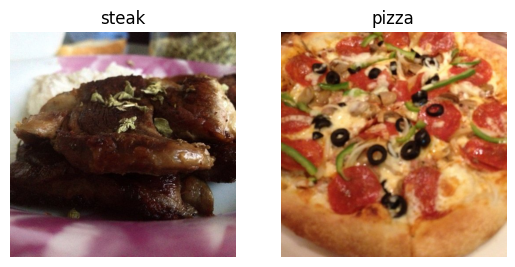

In [21]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

One of the most important steps for a machine learning project is creating a training and test set.

Our data is already split into training and test sets. 

To start, define the training and test directory paths.

In [22]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Turn our data into **batches**.



In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

Our images and labels are in batches of 32.


In [26]:
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [27]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a model 

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [29]:
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), 
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') 
])

In [30]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

### 4. Fit a model


In [31]:
len(train_data), len(test_data)

(47, 16)

In [32]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 198ms/step - loss: 0.6262 - accuracy: 0.6733 - val_loss: 0.4172 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4260 - accuracy: 0.8253 - val_loss: 0.3766 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.2717 - accuracy: 0.9100 - val_loss: 0.3451 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.1141 - accuracy: 0.9720 - val_loss: 0.3705 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.0478 - accuracy: 0.9900 - val_loss: 0.5217 - val_accuracy: 0.8220


### 5. Evaluate the model

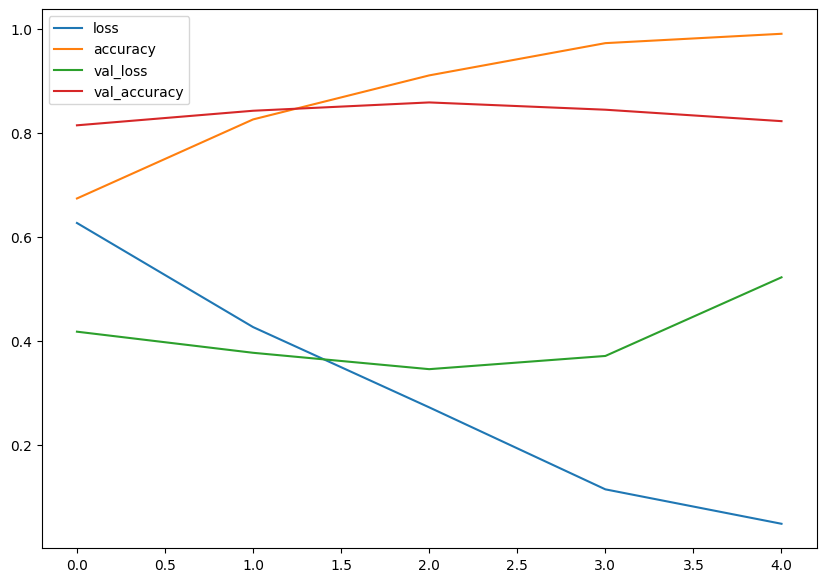

In [33]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

Looks like our model is **overfitting** the training dataset.

When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus its ability to generalize to unseen data will be diminished.


In [34]:
def plot_loss_curves(history):
  
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

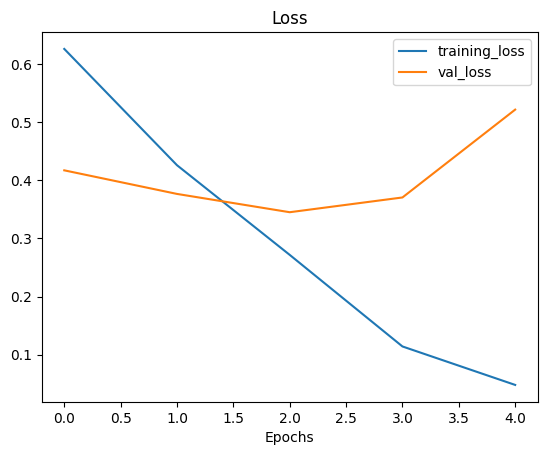

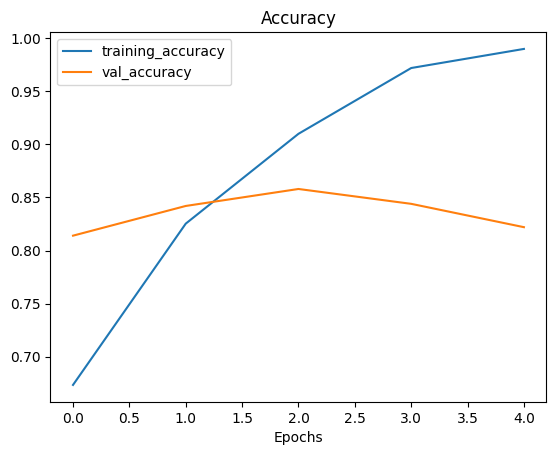

In [35]:
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means model is probably overfitting.

In [36]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 6. Adjust the model parameters


In [37]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [38]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [39]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 196ms/step - loss: 0.6482 - accuracy: 0.6240 - val_loss: 0.5451 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4537 - accuracy: 0.8013 - val_loss: 0.3536 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4161 - accuracy: 0.8233 - val_loss: 0.3578 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3903 - accuracy: 0.8353 - val_loss: 0.3509 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3567 - accuracy: 0.8513 - val_loss: 0.3200 - val_accuracy: 0.8700


model_5 is performing worse on the training set but better on the validation set.


In [40]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

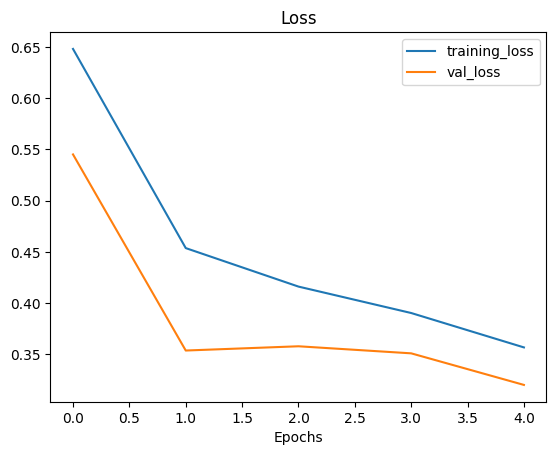

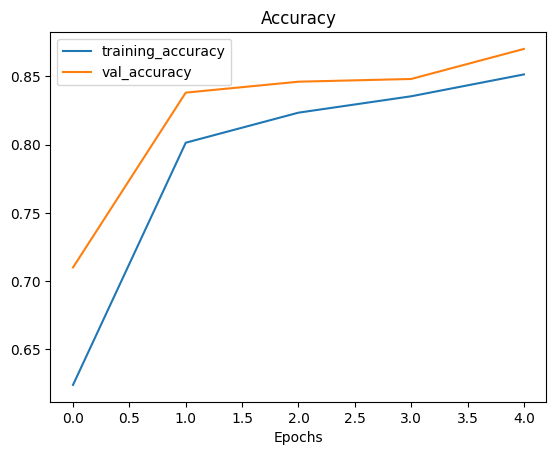

In [41]:
plot_loss_curves(history_5)

Here, The training curves get a lot closer to eachother. However, the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Try another method of overfitting prevention, data augmentation.


In [42]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees 
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

train_datagen = ImageDataGenerator(rescale=1/255.) 

test_datagen = ImageDataGenerator(rescale=1/255.)

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Data augmentation is usally only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [43]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) 

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) 
print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [44]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # labels aren't augmented, they stay the same

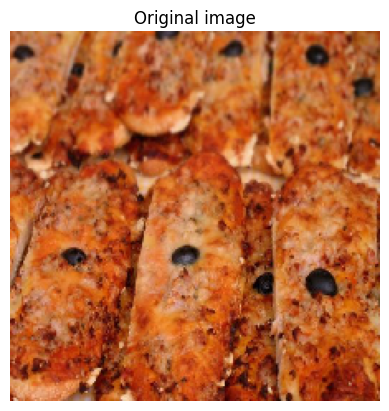

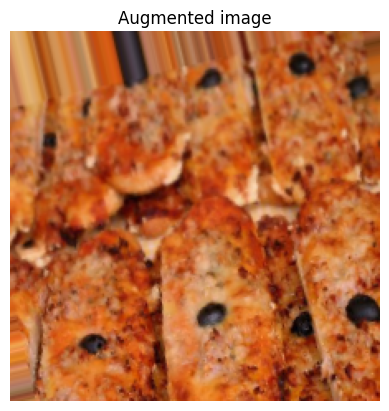

In [45]:
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [46]:
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), 
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented, 
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 472ms/step - loss: 0.8005 - accuracy: 0.4447 - val_loss: 0.7007 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 22s 475ms/step - loss: 0.6981 - accuracy: 0.4267 - val_loss: 0.6918 - val_accuracy: 0.5140
Epoch 3/5
47/47 [==============================] - 22s 474ms/step - loss: 0.6938 - accuracy: 0.5033 - val_loss: 0.6896 - val_accuracy: 0.5100
Epoch 4/5
47/47 [==============================] - 22s 477ms/step - loss: 0.6886 - accuracy: 0.5120 - val_loss: 0.6732 - val_accuracy: 0.5240
Epoch 5/5
47/47 [==============================] - 22s 477ms/step - loss: 0.7195 - accuracy: 0.5187 - val_loss: 0.6886 - val_accuracy: 0.5360


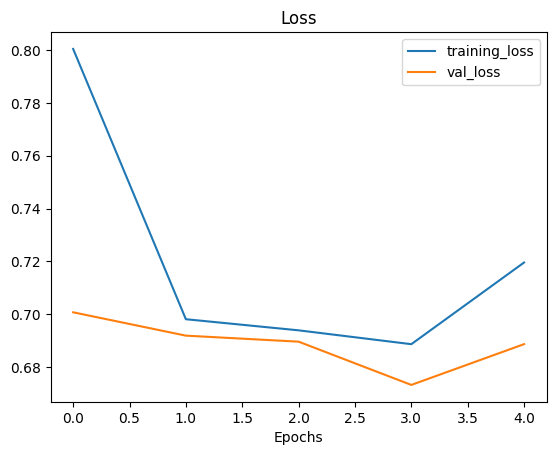

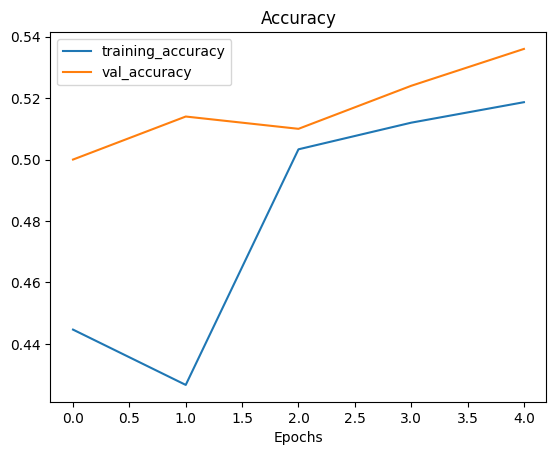

In [47]:
plot_loss_curves(history_6)

Our validation loss curve is heading in the right direction but it's a bit jumpy.


In [48]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [49]:
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 474ms/step - loss: 0.6685 - accuracy: 0.5613 - val_loss: 0.5886 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 22s 478ms/step - loss: 0.5598 - accuracy: 0.7073 - val_loss: 0.4351 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4849 - accuracy: 0.7647 - val_loss: 0.4040 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 23s 487ms/step - loss: 0.4862 - accuracy: 0.7733 - val_loss: 0.4282 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 23s 486ms/step - loss: 0.4627 - accuracy: 0.7873 - val_loss: 0.3589 - val_accuracy: 0.8540


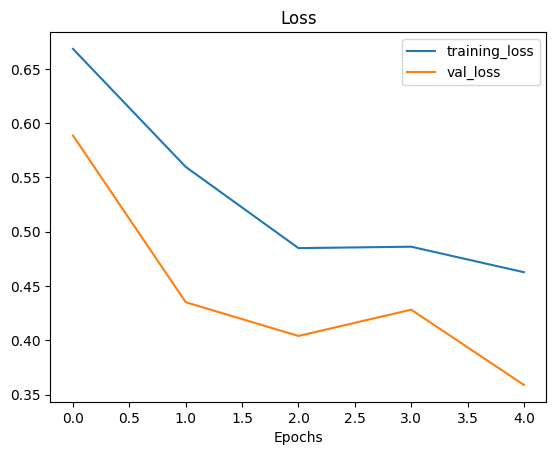

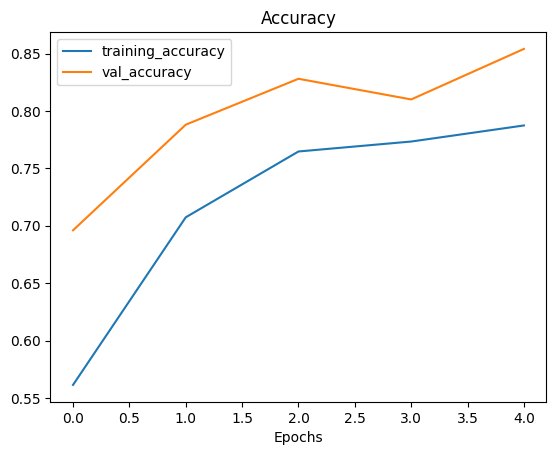

In [50]:
plot_loss_curves(history_7)

With `model_7` how the performance on the training dataset improves almost immediately compared to `model_6`. 

### 7. Repeat until get desired result



In [51]:
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), 
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 492ms/step - loss: 0.6345 - accuracy: 0.6267 - val_loss: 0.4843 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 23s 495ms/step - loss: 0.5293 - accuracy: 0.7327 - val_loss: 0.3829 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 23s 490ms/step - loss: 0.5296 - accuracy: 0.7360 - val_loss: 0.5177 - val_accuracy: 0.7160
Epoch 4/5
47/47 [==============================] - 22s 475ms/step - loss: 0.4971 - accuracy: 0.7560 - val_loss: 0.3477 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 22s 476ms/step - loss: 0.4670 - accuracy: 0.7927 - val_loss: 0.3511 - val_accuracy: 0.8540


In [52]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [53]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

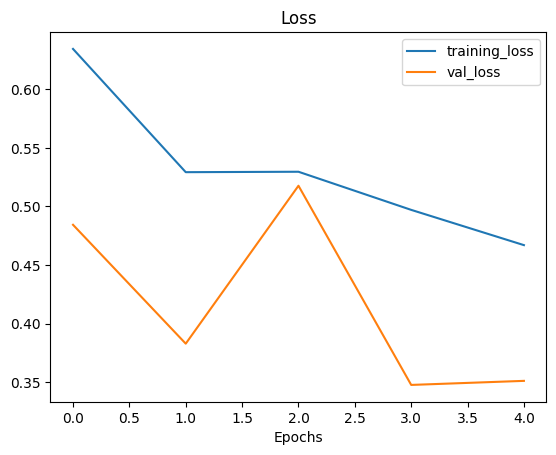

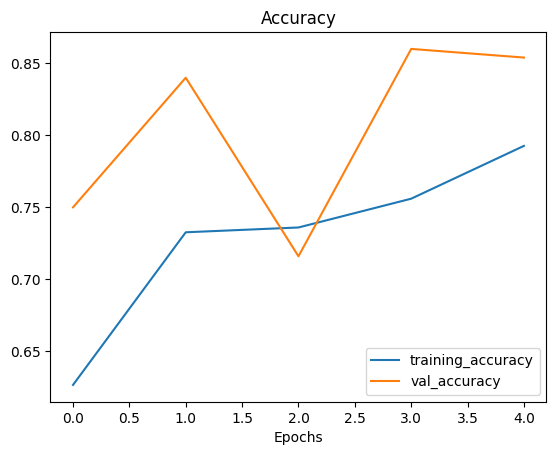

In [54]:
plot_loss_curves(history_8)

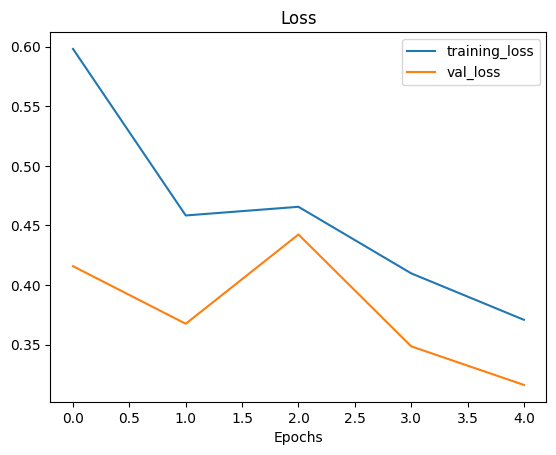

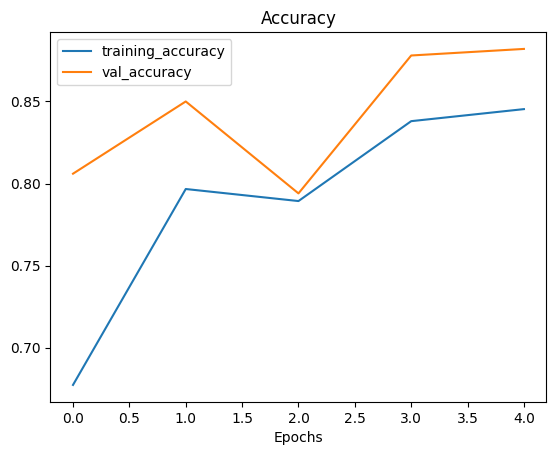

In [55]:
plot_loss_curves(history_1)

### Making a prediction 

In [56]:
print(class_names)

['pizza' 'steak']


In [59]:
def load_and_prep_image(filename, img_shape=224):
  
  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  return img

In [60]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

Although our image is in the same shape as the images our model has been trained on, we still missing a dimension.

Model was trained on data in the shape of `(batch_size, 224, 224, 3)`.

We can fix this by adding an extra to our custom image tensor using [`tf.expand_dims`]

In [62]:
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) 
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [63]:
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 401ms/step


array([[0.7315909]], dtype=float32)

In [64]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [65]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [66]:
def pred_and_plot(model, filename, class_names):
  
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 23ms/step


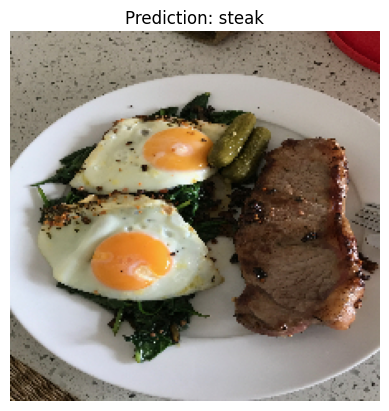

In [67]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

Nice! Model got the prediction right.
